# Data science and machine learning project
## car price prediction web app

### In this project i created an exploratory data analysis with some visualisations and a machine learning model that predicts the approximate price of a car based on the user's input informations in a web interface.

#### note: please wait for the geocode module when executing cells i had to add a delay for every execution to respect the api policies

## Technologies and libraries used in this project :
* Python
* Pandas
* plotly
* Geopy
* sklearn
* Streamlit

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#check usage
import plotly.express as px

In [79]:
df=pd.read_csv("CinciatiCars_cleanedversion.csv")

In [80]:
df.head()

,Unnamed: 0,Model,Location,Miles,Prices,Year,Scraped_On,Dealership
0,0,Honda civic LX Sedan 4D,"Newport, KY",82000.0,"$13,900",2016,2024-07-01,False
1,1,Volkswagen jetta 1.8T SEL Sedan 4D,"Cincinnati, OH",67000.0,"$4,600",2015,2024-07-01,True
2,2,Toyota corolla LE Sedan 4D,"Fort Mitchell, KY",87000.0,"$13,000",2020,2024-07-01,False
3,3,Hyundai sonata SE Sedan 4D,"Dayton, OH",110000.0,"$7,499",2016,2024-07-01,False
4,4,Hyundai elantra SE Sedan 4D,"Louisville, KY",114000.0,"$6,500",2017,2024-07-01,True


### data cleaning

In [81]:
df=df.drop("Scraped_On",axis=1)

In [82]:
df["Model"]=df["Model"].apply(lambda x:x.strip())
df["Manufacturer"]=df["Model"].apply(lambda x:x.split(" ")[0])
df["Model_name"]=df["Model"].apply(lambda x:" ".join(x.split(" ")[1:]))
df.head(10)
df["Manufacturer"]=df["Manufacturer"].apply(lambda x:x+" Romeo" if x=="Alfa" else x)
df["Manufacturer"]=df["Manufacturer"].apply(lambda x:"Volkswagen" if x=="Jetta" else x)
df["Prices"]=df['Prices'].apply(lambda x:int(x[x.find("$")+1:].replace(",",""))if x.upper()!="FREE"else 0)

### cars count by manufacturer

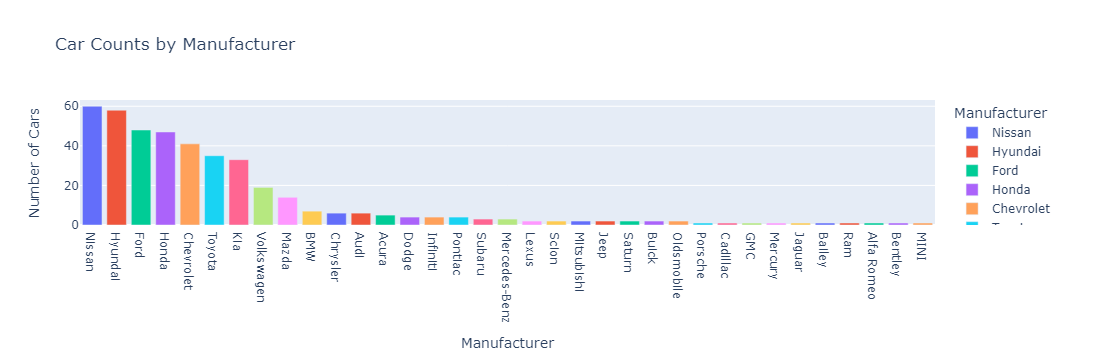

In [83]:
car_counts=df["Manufacturer"].value_counts().reset_index(name="Count")
px.bar(car_counts, x='Manufacturer', y='Count',color='Manufacturer',labels={'Count': 'Number of Cars','Manufacturer': 'Manufacturer'},title='Car Counts by Manufacturer')

### Distribution of Cars by Mileage Range

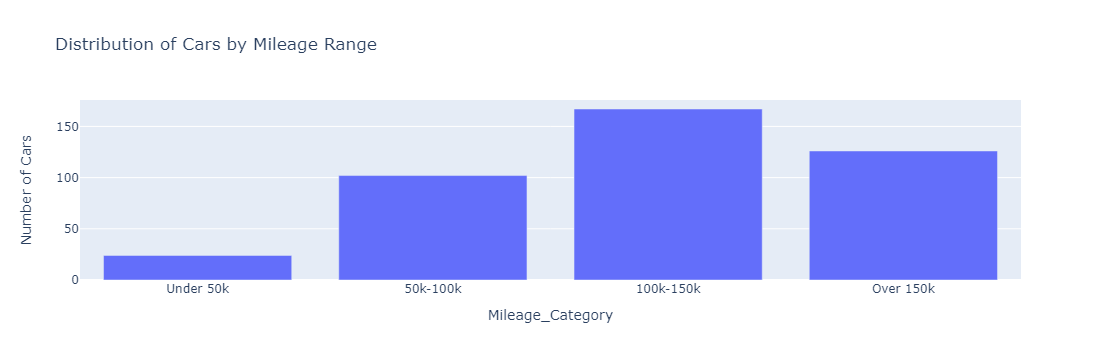

In [84]:
bin=[0,50000,100000,150000,float("inf")]
label=["Under 50k","50k-100k","100k-150k","Over 150k"]
dfm=df
dfm["Mileage_Category"]=pd.cut(df["Miles"], bins=bin, labels=label)
mileage_counts= dfm["Mileage_Category"].value_counts().sort_index()
px.bar(mileage_counts,x=mileage_counts.index,y=mileage_counts.values,labels={"x": "Mileage Range","y":"Number of Cars"},title="Distribution of Cars by Mileage Range")

### Most expensive car

In [85]:
most_exp_car=df.sort_values(by='Prices',ascending=False).head(1)
print(f"The most expensive car is the {most_exp_car.values[0][1]} it is from year {most_exp_car.values[0][5]} and it is priced at ${most_exp_car.values[0][4]}.")

The most expensive car is the BMW m3 Convertible 2D it is from year 1998 and it is priced at $23500.


### Cars that are from dealer and not from dealer

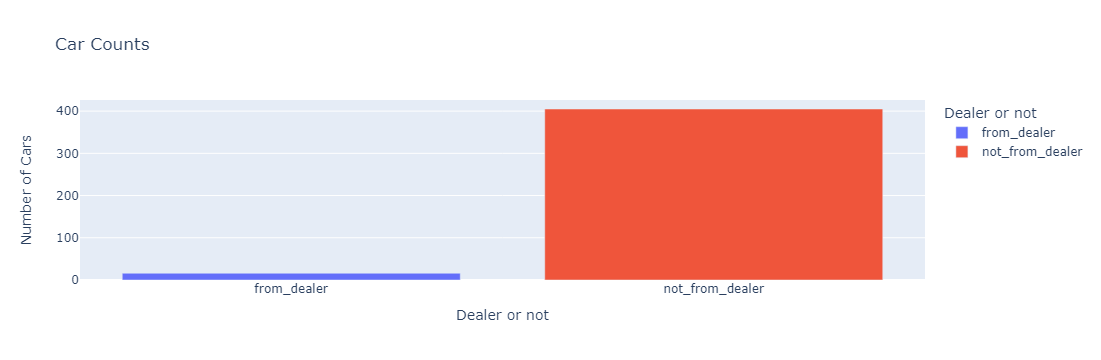

In [86]:
dnd=dict()
dnd["from_dealer"],dnd["not_from_dealer"]=len(df[df["Dealership"]==True]),len(df[df["Dealership"]!=True])
dealer_df=pd.DataFrame.from_dict(dnd, orient="index").reset_index()
dealer_df.columns = ["Status", "Count"]
px.bar(dealer_df,x="Status",y="Count",color="Status",labels={"Count":"Number of Cars","Status":"Dealer or not"},title="Car Counts")

### Cars count for each year

### Creating a map to display cars distribution by location

### geocoding AI generated function that returns longtitude and altitude of a location using geopy

In [87]:
def geocode_location(location):
    try:
        geocode_result = geolocator.geocode(location)
        if geocode_result:
            return geocode_result.latitude, geocode_result.longitude
        else:
            return None, None
    except:
        return None, None


### calling the geocoding function on the dataset's locations then merging the location_coords dataframe with the main dataframe by location

In [88]:
unique_locations=df['Location'].unique()
from geopy.geocoders import Nominatim
import time
geolocator = Nominatim(user_agent="dhia_app")
location_coords = {}
i=1
for location in unique_locations:
    lat,lon=geocode_location(location)
    location_coords[location]={"Latitude":lat,"Longitude":lon}
    time.sleep(2)  # Adding delay between requests
    print(i,end="|")
    i=i+1


1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36|37|38|39|40|41|42|43|44|45|46|47|48|49|50|51|52|53|54|55|56|57|58|59|60|61|62|63|64|65|66|

In [89]:
location_coords_df = pd.DataFrame.from_dict(location_coords, orient="index").reset_index()
location_coords_df.columns = ["Location", "Latitude", "Longitude"]
df2=pd.merge(df,location_coords_df,on="Location",how="left")
df2.head()

,Unnamed: 0,Model,Location,Miles,Prices,Year,Dealership,Manufacturer,Model_name,Mileage_Category,Latitude,Longitude
0,0,Honda civic LX Sedan 4D,"Newport, KY",82000.0,13900,2016,False,Honda,civic LX Sedan 4D,50k-100k,39.088947,-84.491952
1,1,Volkswagen jetta 1.8T SEL Sedan 4D,"Cincinnati, OH",67000.0,4600,2015,True,Volkswagen,jetta 1.8T SEL Sedan 4D,50k-100k,39.101454,-84.512460
2,2,Toyota corolla LE Sedan 4D,"Fort Mitchell, KY",87000.0,13000,2020,False,Toyota,corolla LE Sedan 4D,50k-100k,39.059505,-84.547443
3,3,Hyundai sonata SE Sedan 4D,"Dayton, OH",110000.0,7499,2016,False,Hyundai,sonata SE Sedan 4D,100k-150k,39.758948,-84.191607
4,4,Hyundai elantra SE Sedan 4D,"Louisville, KY",114000.0,6500,2017,True,Hyundai,elantra SE Sedan 4D,100k-150k,38.254238,-85.759407


### displaying the map with plotly expresse

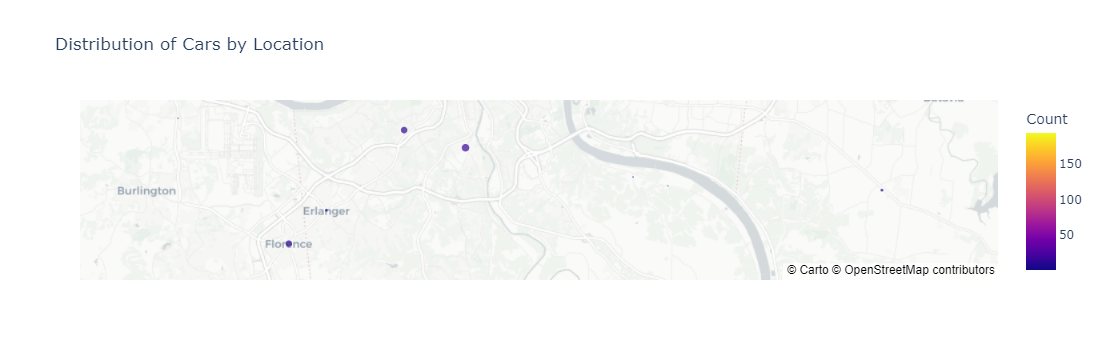

In [90]:
df3=df2[["Location","Latitude","Longitude"]].value_counts().reset_index(name="Count")
px.scatter_mapbox(df3, 
                        lat='Latitude', 
                        lon='Longitude', 
                        size='Count', 
                        color='Count',
                        hover_name='Location', 
                        hover_data=['Count'], 
                        zoom=10,
                        mapbox_style='carto-positron', 
                        title='Distribution of Cars by Location')

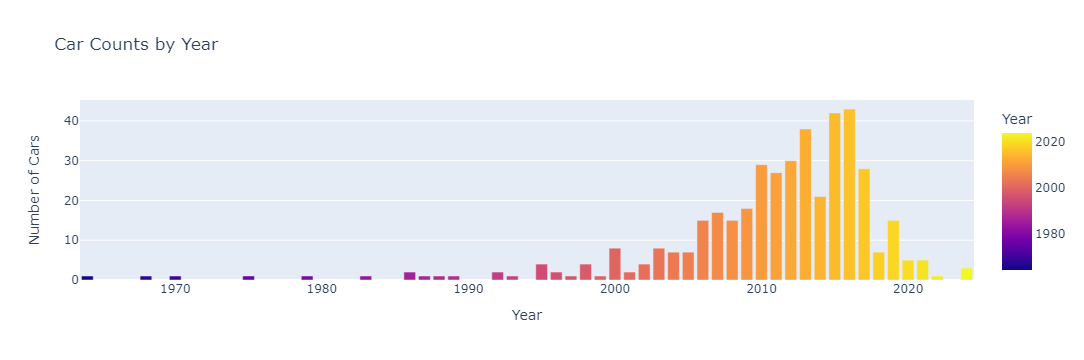

In [91]:
car_counts=df["Year"].value_counts().reset_index(name="Count")
px.bar(car_counts, x='Year', y='Count',color='Year',labels={'Count': 'Number of Cars','Year': 'Year'},title='Car Counts by Year')

### Now preparing the data for the ML model

#### function that returns a list with numerical values

In [92]:
def gen_l(v):
    return [i for i in range(len(v))]

#### turning data to numerical and deleting nulls

In [93]:
df_copy=df.dropna()
df_copy["Dealership"]=df_copy["Dealership"].apply(int)
df_copy["Location"].replace(df_copy["Location"].unique(),gen_l(df_copy["Location"].unique()),inplace=True)
df_copy["Manufacturer"].replace(df_copy["Manufacturer"].unique(),gen_l(df_copy["Manufacturer"].unique()),inplace=True)
df_copy["Model_name"].replace(df_copy["Model_name"].unique(),gen_l(df_copy["Model_name"].unique()),inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 0 to 420
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        419 non-null    int64   
 1   Model             419 non-null    object  
 2   Location          419 non-null    int64   
 3   Miles             419 non-null    float64 
 4   Prices            419 non-null    int64   
 5   Year              419 non-null    int64   
 6   Dealership        419 non-null    int64   
 7   Manufacturer      419 non-null    int64   
 8   Model_name        419 non-null    int64   
 9   Mileage_Category  419 non-null    category
dtypes: category(1), float64(1), int64(7), object(1)
memory usage: 33.3+ KB


C:\Users\dhiea.DHIA\AppData\Local\Temp\ipykernel_7564\604618880.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dhiea.DHIA\AppData\Local\Temp\ipykernel_7564\604618880.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dhiea.DHIA\AppData\Local\Temp\ipykernel_7564\604618880.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dhiea.DHIA\AppData\Local\

#### splitting data 

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [95]:
input_data=df_copy.drop(columns=["Unnamed: 0","Model","Prices","Mileage_Category"])
output_data=df_copy["Prices"]
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2)

#### creating model

In [96]:
model=LinearRegression()

#### trainig the model

In [97]:
model.fit(x_train,y_train)

LinearRegression()

In [98]:
predict=model.predict(x_test)

### saving the model

In [99]:
import pickle
pickle.dump(model,open("model.pk1","wb"))

In [100]:
df.to_csv("final_data.csv")

### i created a streamlit app that has a ui to enter car information

![title](picture.png)

## streamlit app github link : [https://github.com/Dhieaaldin/dhia_louati/blob/8784feda6168b867aa3f2c69bbf8d398338c584d/projects/project6/app.py](https://github.com/Dhieaaldin/dhia_louati/blob/8784feda6168b867aa3f2c69bbf8d398338c584d/projects/project6/app.py)
## notebook github link : [https://github.com/Dhieaaldin/dhia_louati/blob/8784feda6168b867aa3f2c69bbf8d398338c584d/projects/project6/Untitled1.ipynb](https://github.com/Dhieaaldin/dhia_louati/blob/8784feda6168b867aa3f2c69bbf8d398338c584d/projects/project6/Untitled1.ipynb)
## project repository : [https://github.com/Dhieaaldin/dhia_louati/tree/8784feda6168b867aa3f2c69bbf8d398338c584d/projects/project6](https://github.com/Dhieaaldin/dhia_louati/tree/8784feda6168b867aa3f2c69bbf8d398338c584d/projects/project6)
## portfolio link : [https://dhieaaldin.github.io/portfolio_projects/](https://dhieaaldin.github.io/portfolio_projects/)